In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [86]:
df = pd.read_csv('CGM_glucose_data.csv')

In [89]:
df['time_diff'] = 10
df['time'] = df.time_diff.cumsum()

In [91]:
ts = pd.DataFrame(df.time)
ys = pd.DataFrame(df['Glucose'])

In [240]:
# MODEL FIT AND PREDICTION

# Parameters of the predictive model. ph is Prediction horizon, mu is Forgetting factor.
ph = 100
mu = 0.9

In [241]:
#n_s = len(df)
n_s = 5000

# Arrays to hold predicted values
tp_pred = np.zeros(n_s-1) 
yp_pred = np.zeros(n_s-1)



In [242]:
# At every iteration of the for loop a new sample from CGM is acquired.
for i in range(2, n_s+1):# start out with 2 leading datapoints
    ts_tmp = ts[0:i]
    ys_tmp = ys[0:i]
    ns = len(ys_tmp)
    
    # The mu**k assigns the weight to the previous samples.
    weights = np.ones(ns)*mu
    for k in range(ns):
        weights[k] = weights[k]**k #More distant examples are downweighted exponentially
    weights = np.flip(weights, 0)
        

    # MODEL
    # Linear Regression.
    lm_tmp = LinearRegression() 
    model_tmp = lm_tmp.fit(ts_tmp, ys_tmp, sample_weight=weights)# times are x, glucose readings are y
    # Coefficients of the linear model, y = mx + q 
    m_tmp = model_tmp.coef_
    q_tmp = model_tmp.intercept_

    # PREDICTION
    tp = ts.iloc[i-1,0] + ph #next time stamp
    yp = m_tmp*tp + q_tmp #mx + b
      
    tp_pred[i-2] = tp    
    yp_pred[i-2] = yp



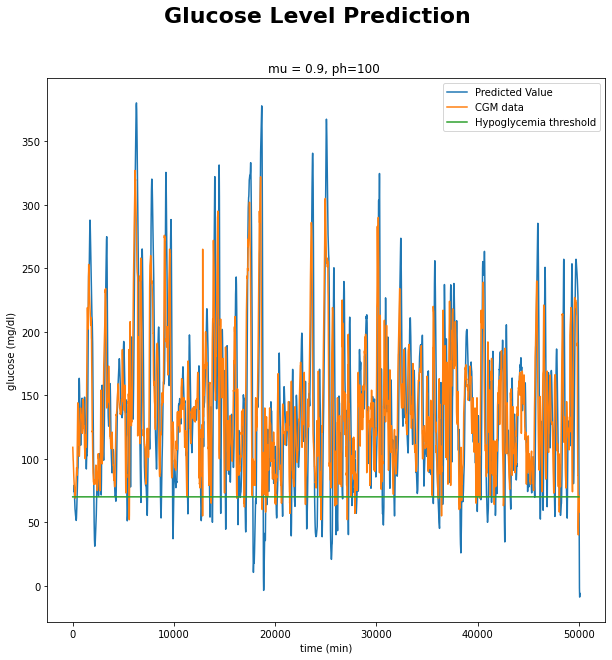

In [243]:
# Hypoglycemia threshold vector.    
t_tot = [l for l in range(n_s*10)]
hypoglycemiaTH = 70*np.ones(len(t_tot)) 
    
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Glucose Level Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred, yp_pred, label='Predicted Value') 
ax.plot(ts.iloc[0:n_s,0], ys.iloc[0:n_s,0], label='CGM data') 
ax.plot(t_tot, hypoglycemiaTH, label='Hypoglycemia threshold')
ax.set_xlabel('time (min)')
ax.set_ylabel('glucose (mg/dl)')
ax.legend()

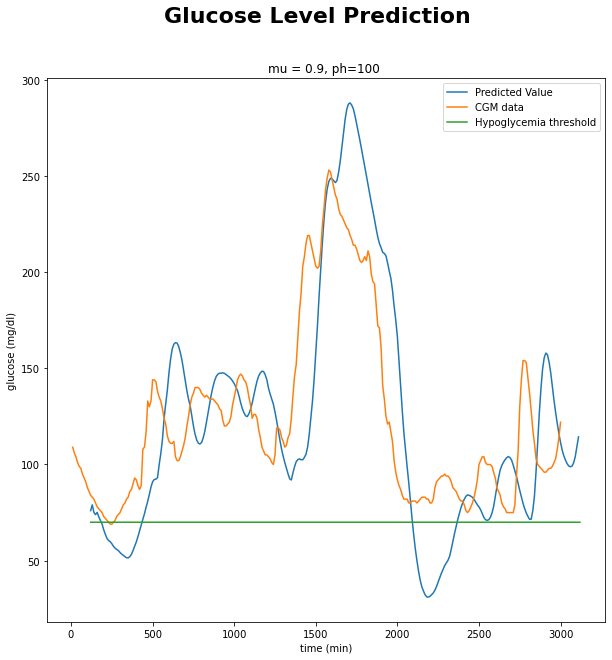

In [244]:
# PLOT EARLY
# Hypoglycemia threshold vector.    
t_tot = [l for l in range(int(min(tp_pred)), int(min(tp_pred+3000)))]
hypoglycemiaTH = 70*np.ones(len(t_tot)) 
    
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Glucose Level Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[0:300], yp_pred[0:300], label='Predicted Value') 
ax.plot(ts.iloc[0:300,0], ys.iloc[0:300,0], label='CGM data') 
ax.plot(t_tot, hypoglycemiaTH, label='Hypoglycemia threshold')
ax.set_xlabel('time (min)')
ax.set_ylabel('glucose (mg/dl)')
ax.legend()

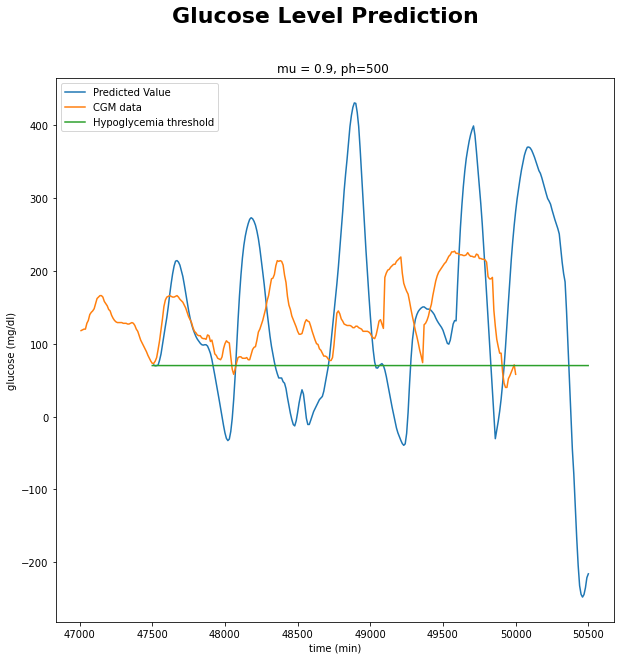

In [238]:
# PLOT LATE
# Hypoglycemia threshold vector.
maxt = max(tp_pred)
t_tot = [l for l in range(int(maxt)-3000, int(maxt))]
hypoglycemiaTH = 70*np.ones(len(t_tot)) 
    
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('Glucose Level Prediction', fontsize=22, fontweight='bold')
ax.set_title('mu = %g, ph=%g ' %(mu, ph))
ax.plot(tp_pred[-300:], yp_pred[-300:], label='Predicted Value') 
ax.plot(ts.iloc[n_s-300:n_s,0], ys.iloc[n_s-300:n_s,0], label='CGM data') 
ax.plot(t_tot, hypoglycemiaTH, label='Hypoglycemia threshold')
ax.set_xlabel('time (min)')
ax.set_ylabel('glucose (mg/dl)')
ax.legend()

In [245]:
from sklearn.metrics import mean_squared_error as mse
print("RMSE is", mse(ys[1:5000],yp_pred))

RMSE is 702.971030198231
